# Music Prediction

### Using Billboard top 100 from 2000 to 2019 and spotify hit predictor dataset, predict which factors makes music as a hit. The model will predict whether the music can be a hit with the accuracy of 94%

Little background of labels: datas are splited into two: 2000 to 2009, 2010 to 2019. <br>
Most of labels with 00 or 0 is from 2000 to 2009, most of labels with 10 or 1 is from 2010 to 2019 <br><br>

Flatiron AI Academy lectures were used as a reference

## Data Initialization

This file will initialize datas by: open, save as dataframe, clean, combine, simple visualization <br>

Using datas from 2000 to 2019, using top 100 music in billboards, find which components impact popularity of music

First, import any libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime

plt.style.use('seaborn')

Open csv file as dataframe

In [2]:
df_board = pd.read_csv('data/billboardHot100_1999-2019.csv')
df_board.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN


In [3]:
df_00 = pd.read_csv('data/dataset-of-00s.csv')
df_00.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [4]:
df_10 = pd.read_csv('data/dataset-of-10s.csv')
df_10.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


Check whether each dataframe has any null values and type of each colunms

In [5]:
print(df_board.isna().sum())
df_board.info()

Unnamed: 0             0
Artists                0
Name                   0
Weekly.rank            0
Peak.position       7069
Weeks.on.chart      7069
Week                   0
Date               12247
Genre                  0
Writing.Credits     7213
Lyrics                 0
Features           75936
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       97225 non-null  int64  
 1   Artists          97225 non-null  object 
 2   Name             97225 non-null  object 
 3   Weekly.rank      97225 non-null  int64  
 4   Peak.position    90156 non-null  float64
 5   Weeks.on.chart   90156 non-null  float64
 6   Week             97225 non-null  object 
 7   Date             84978 non-null  object 
 8   Genre            97225 non-null  object 
 9   Writing.Credits  90012 non-null  object 
 10  Lyrics           9722

In [6]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5872 non-null   object 
 1   artist            5872 non-null   object 
 2   uri               5872 non-null   object 
 3   danceability      5872 non-null   float64
 4   energy            5872 non-null   float64
 5   key               5872 non-null   int64  
 6   loudness          5872 non-null   float64
 7   mode              5872 non-null   int64  
 8   speechiness       5872 non-null   float64
 9   acousticness      5872 non-null   float64
 10  instrumentalness  5872 non-null   float64
 11  liveness          5872 non-null   float64
 12  valence           5872 non-null   float64
 13  tempo             5872 non-null   float64
 14  duration_ms       5872 non-null   int64  
 15  time_signature    5872 non-null   int64  
 16  chorus_hit        5872 non-null   float64


In [7]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


### data cleaning

Based on given information, start to clean and organize data

datas from df_00 and df_10 (datas from spotify) has featuring information while billboard title does not have it <br>
check for clearfication

In [8]:
print([word for word in df_board['Name'] if word.find("feat") != -1])

['Undefeated', 'Undefeated', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather']


remove featuring information from df_00 and df_10

In [9]:
# there are few ways of including featuring information

df_00['track'] = list(map(lambda x: x.split('(feat.', 1)[0], df_00['track']))
df_00['track'] = list(map(lambda x: x.split('[feat.', 1)[0], df_00['track']))
df_00['track'] = list(map(lambda x: x.split('feat.', 1)[0], df_00['track']))
df_00['track'] = list(map(lambda x: x.split('featuring', 1)[0], df_00['track']))
df_00['track'] = list(map(lambda x: x.split(' feat', 1)[0], df_00['track']))

df_00.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [10]:
# check whether title that has feat but not featuring is still included 
# while removing featuring information

print([word for word in df_00['track'] if word.find("feat") != -1])

['Shake Ya Tailfeather']


In [11]:
# there are more music that has different variation of including featuring information

df_10['track'] = list(map(lambda x: x.split('(feat.', 1)[0], df_10['track']))
df_10['track'] = list(map(lambda x: x.split('feat.', 1)[0], df_10['track']))
df_10['track'] = list(map(lambda x: x.split('[feat.', 1)[0], df_10['track']))
df_10['track'] = list(map(lambda x: x.split('featuring', 1)[0], df_10['track']))
df_10['track'] = list(map(lambda x: x.split(' feat', 1)[0], df_10['track']))

df_10.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears,Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


checks for the row that has feat in title

In [12]:
print([word for word in df_10['track'] if word.find("feat") != -1])

['Defeated Clown']


Before merging, removing unnecessary colunms for time and space saving purpose

In [13]:
df_00 = df_00.drop(['uri'], axis = 1)
df_00.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [14]:
df_10 = df_10.drop(['uri'], axis = 1)
df_10.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears,Keys N Krates,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [15]:
df_board = df_board.drop(['Lyrics', 'Writing.Credits', 'Unnamed: 0'] , axis = 1)
df_board.head()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",Billy Ray Cyrus
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,NaN
2,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",NaN
3,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",NaN
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",NaN


change the datatype to number (float to int) and datetime

In [16]:
df_board.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Artists         97225 non-null  object 
 1   Name            97225 non-null  object 
 2   Weekly.rank     97225 non-null  int64  
 3   Peak.position   90156 non-null  float64
 4   Weeks.on.chart  90156 non-null  float64
 5   Week            97225 non-null  object 
 6   Date            84978 non-null  object 
 7   Genre           97225 non-null  object 
 8   Features        21289 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 6.7+ MB


In [17]:
df_board.head()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",Billy Ray Cyrus
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,NaN
2,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",NaN
3,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",NaN
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",NaN


because peak position is all int with NaN without 0, replace NaN with 0

In [18]:
df_board['Peak.position'].value_counts()

1.0      5566
2.0      2521
3.0      2238
4.0      2041
5.0      1905
         ... 
96.0      188
97.0      183
98.0      115
99.0       71
100.0      11
Name: Peak.position, Length: 100, dtype: int64

In [19]:
df_board['Peak.position'].isna().sum()

7069

In [20]:
df_board['Peak.position'].fillna(0, inplace = True)
df_board['Peak.position'].isna().sum()

0

In [21]:
df_board['Peak.position'].value_counts()

0.0      7069
1.0      5566
2.0      2521
3.0      2238
4.0      2041
         ... 
96.0      188
97.0      183
98.0      115
99.0       71
100.0      11
Name: Peak.position, Length: 101, dtype: int64

Do the same with weeks on chart (0 weeks on chart means that it was on chart less than a week)

In [22]:
df_board['Weeks.on.chart'].isna().sum()

7069

In [23]:
df_board['Weeks.on.chart'].fillna(0, inplace = True)
df_board['Weeks.on.chart'].isna().sum()

0

In [24]:
df_board['Weeks.on.chart'].value_counts()

0.0     7153
2.0     5928
3.0     5490
4.0     5197
5.0     5000
        ... 
85.0       1
83.0       1
87.0       1
84.0       1
82.0       1
Name: Weeks.on.chart, Length: 88, dtype: int64

change to int

In [25]:
df_board.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Artists         97225 non-null  object 
 1   Name            97225 non-null  object 
 2   Weekly.rank     97225 non-null  int64  
 3   Peak.position   97225 non-null  float64
 4   Weeks.on.chart  97225 non-null  float64
 5   Week            97225 non-null  object 
 6   Date            84978 non-null  object 
 7   Genre           97225 non-null  object 
 8   Features        21289 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 6.7+ MB


In [26]:
df_board['Peak.position'] = np.array(df_board['Peak.position'], int)
df_board['Weeks.on.chart'] = np.array(df_board['Weeks.on.chart'], int)
type(df_board['Weeks.on.chart'].iloc[0])

numpy.int32

change Week and date columns to datetime 

In [27]:
df_board['Week'] = pd.to_datetime(df_board['Week']).dt.date
df_board['Date'] = pd.to_datetime(df_board['Date']).dt.date

In [28]:
df_board.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Artists         97225 non-null  object
 1   Name            97225 non-null  object
 2   Weekly.rank     97225 non-null  int64 
 3   Peak.position   97225 non-null  int32 
 4   Weeks.on.chart  97225 non-null  int32 
 5   Week            97225 non-null  object
 6   Date            84978 non-null  object
 7   Genre           97225 non-null  object
 8   Features        21289 non-null  object
dtypes: int32(2), int64(1), object(6)
memory usage: 5.9+ MB


### Merge

Try multiple way of merging to find the best method

start merging at first, try merge inner join

In [29]:
print(f"""
length of df_00 before merging: {len(df_00)}
length of df_10 before merging: {len(df_10)}
""")


length of df_00 before merging: 5872
length of df_10 before merging: 6398



In [30]:
# split the board into date match with df_00 and df_10

df_board_00 = df_board[(df_board['Week'] > datetime.date(1999, 12, 31)) & (df_board['Week'] < datetime.date(2010, 1, 1))]
df_board_10 = df_board[df_board['Week'] > datetime.date(2009, 12, 31)]
df_board_10.tail()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
46875,LMFAO,Shots,96,96,3,2010-01-07,2009-07-07,Rap,Lil Jon
46876,Lady Antebellum,American Honey,97,0,0,2010-01-07,2010-01-11,"Country,Rock",NaN
46877,Beyonce,Video Phone,98,65,5,2010-01-07,2009-09-22,"Crunk,R&;B,Pop",Lady Gaga
46878,Lifehouse,Halfway Gone,99,91,3,2010-01-07,2009-10-27,Rock,NaN
46879,Thirty Seconds To Mars,Kings And Queens,100,82,5,2010-01-07,2009-12-04,"Alternative Rock,Alternative,Rock",NaN


In [31]:
df_00_merged = df_00.merge(df_board_00, left_on = 'track', right_on = 'Name')
df_10_merged = df_10.merge(df_board_10, left_on = 'track', right_on = 'Name')

In [32]:
print(f"""
length of df_00 after merging: {len(df_00_merged)}
length of df_10 after merging: {len(df_10_merged)}
""")


length of df_00 after merging: 50650
length of df_10 after merging: 52514



remove duplicates columns such as name of music and artists

In [33]:
print(df_00_merged.columns)

Index(['track', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'Artists', 'Name', 'Weekly.rank', 'Peak.position',
       'Weeks.on.chart', 'Week', 'Date', 'Genre', 'Features'],
      dtype='object')


In [34]:
df_00_merged.drop(['Artists', 'Name'], axis = 1, inplace = True)
df_10_merged.drop(['Artists', 'Name'], axis = 1, inplace = True)
df_00_merged.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,95,65,17,2007-08-22,2007-01-29,Country,NaN
1,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,85,65,16,2007-08-15,2007-01-29,Country,NaN
2,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,79,65,15,2007-08-08,2007-01-29,Country,NaN
3,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,83,65,14,2007-08-01,2007-01-29,Country,NaN
4,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,80,65,13,2007-07-25,2007-01-29,Country,NaN


the number after merge increase because there are multiple duplicates for the musics which were in top 100 billboard for multiple weeks

find the size of data without duplicates for reference purpose

In [35]:
df_tmp1 = df_00_merged.drop_duplicates(subset = ['track', 'artist', 'Date'], keep = 'first').reset_index(drop = True)
df_tmp2 = df_10_merged.drop_duplicates(subset = ['track', 'artist', 'Date'], keep = 'first').reset_index(drop = True)

print(f"""
length of df_00 with duplicates: {len(df_00_merged)}
length of df_10 with duplicates: {len(df_10_merged)}

length of df_00 without duplicates: {len(df_tmp1)}
length of df_10 without duplicates: {len(df_tmp2)}
""")



length of df_00 with duplicates: 50650
length of df_10 with duplicates: 52514

length of df_00 without duplicates: 3051
length of df_10 without duplicates: 3541



In [36]:
df_tmp1.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.270,1,0.0289,0.3680,0.0,...,30.88059,13,1,95,65,17,2007-08-22,2007-01-29,Country,NaN
1,On The Hotline,Pretty Ricky,0.704,0.854,10,-5.477,0,0.1830,0.0185,0.0,...,41.51106,10,1,98,12,19,2007-05-16,NaT,Rap,NaN
2,Where I Come From,Alan Jackson,0.726,0.631,11,-8.136,0,0.0334,0.2200,0.0,...,35.59732,10,1,94,34,20,2002-01-01,2001-07-09,Country,NaN
3,Nothin' To Die For,Tim McGraw,0.481,0.786,10,-5.654,1,0.0288,0.0538,0.0,...,19.65701,11,1,90,68,11,2009-05-07,2007-03-27,"Country,Rock",NaN
4,Amarillo Sky,Jason Aldean,0.491,0.776,2,-3.887,1,0.0393,0.3140,0.0,...,37.86861,9,1,87,59,20,2007-03-07,2006-06-26,Country,NaN


Because there are many information that loses if we remove duplicates, so keep the data without removing the duplicates
important information loses: weekly rank (changes every week even if it stays on chart for multiple weeks)

save the data (that will be used in other file) as csv file 

In [37]:
# save the data that is merged with duplicates music
df_00_merged.to_csv('data/df_00.csv', index = False)
df_10_merged.to_csv('data/df_10.csv', index = False)

### Simple visualization

After simple data organization, display simple visualization for reference

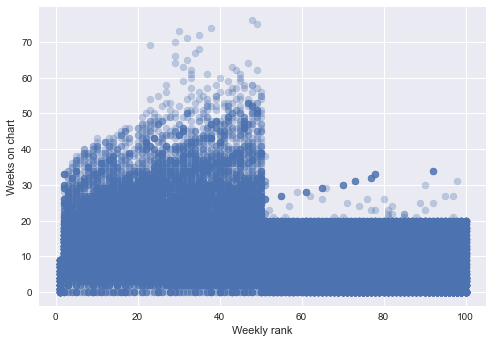

In [38]:
fig, ax = plt.subplots()

ax.scatter(df_00_merged['Weekly.rank'], df_00_merged['Weeks.on.chart'], alpha = 0.3)
ax.set_xlabel("Weekly rank")
ax.set_ylabel("Weeks on chart")

# as weekly rank = 0 is higher than weekly rank 100, flip x axis
# ax.invert_xaxis()

plt.show()

due to datasize, cannot see the relationship, select random values <br>
also change X and Y labels since weeks on chart is time, and time is in X axis most of the time

In [39]:
len(df_00_merged['Weekly.rank'])

50650

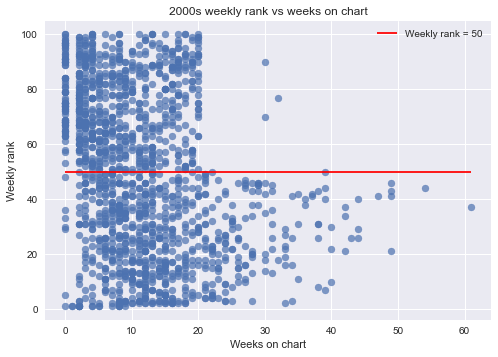

In [40]:
df_00_random_samp = df_00_merged.sample(1500)

fig, ax = plt.subplots()

ax.scatter(df_00_random_samp['Weeks.on.chart'], df_00_random_samp['Weekly.rank'], alpha = 0.7)
ax.hlines(50, 0,np.max(df_00_random_samp['Weeks.on.chart']), label = "Weekly rank = 50", colors = 'red')
ax.legend(loc = "upper right")
ax.set_ylabel("Weekly rank")
ax.set_xlabel("Weeks on chart")
ax.set_title("2000s weekly rank vs weeks on chart")
plt.show()


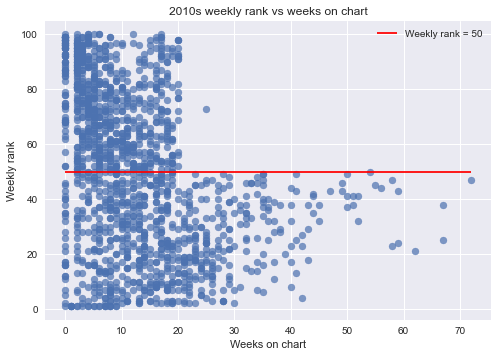

In [41]:
df_10_random_samp = df_10_merged.sample(1500)

fig, ax = plt.subplots()

ax.scatter(df_10_random_samp['Weeks.on.chart'], df_10_random_samp['Weekly.rank'], alpha = 0.7)
ax.hlines(50, 0,np.max(df_10_random_samp['Weeks.on.chart']), label = "Weekly rank = 50", colors = 'red')
ax.legend(loc = "upper right")
ax.set_ylabel("Weekly rank")
ax.set_xlabel("Weeks on chart")
ax.set_title("2010s weekly rank vs weeks on chart")
# ax.invert_xaxis()
plt.show()


in general, it has to be greater than 50 in weekly rank to stay more weeks on chart

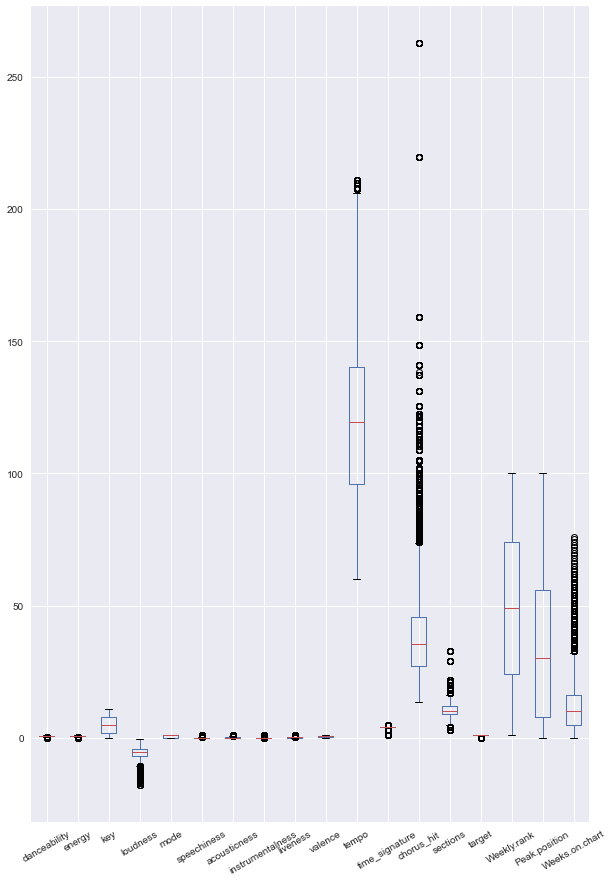

In [42]:
fig, ax = plt.subplots(figsize = (10,15))

df_00_merged.drop('duration_ms', axis = 1).boxplot(ax = ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.show()

Because each data have a different scale, seperate the group into half <br>
standard scaling also works, but at this point, change the data as little as possible <br>

In [43]:
# to make it easier to see, only display values between 0 to 1
df_00_merged.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
count,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000
mean,0.625016,0.708420,5.283455,-5.750286,0.676979,0.092442,0.150978,0.010415,0.176827,0.542723,120.767529,241178.762784,3.970661,39.158387,10.505962,0.968470,49.400513,33.994551,11.514018
std,0.148942,0.165561,3.529707,2.096550,0.467635,0.096355,0.188403,0.075557,0.133689,0.225449,29.494411,46514.277785,0.244605,18.015989,2.474002,0.174747,28.810933,27.611433,8.767081
min,0.113000,0.107000,0.000000,-17.735000,0.000000,0.022400,0.000002,0.000000,0.019300,0.038800,59.972000,61587.000000,1.000000,13.552980,3.000000,0.000000,1.000000,0.000000,0.000000
25%,0.521000,0.599000,2.000000,-6.852000,0.000000,0.033300,0.014200,0.000000,0.090600,0.361000,96.100000,213760.000000,4.000000,27.098630,9.000000,1.000000,24.000000,8.000000,5.000000
50%,0.627000,0.729000,5.000000,-5.460000,1.000000,0.047100,0.069700,0.000000,0.126000,0.548000,119.603000,236107.000000,4.000000,35.306810,10.000000,1.000000,49.000000,30.000000,10.000000
75%,0.727000,0.842000,8.000000,-4.304000,1.000000,0.107000,0.230000,0.000022,0.232000,0.721000,140.095000,261027.000000,4.000000,45.776670,12.000000,1.000000,74.000000,56.000000,16.000000
max,0.986000,0.996000,11.000000,-0.559000,1.000000,0.941000,0.994000,0.982000,0.985000,0.978000,210.857000,992160.000000,5.000000,262.615400,33.000000,1.000000,100.000000,100.000000,76.000000


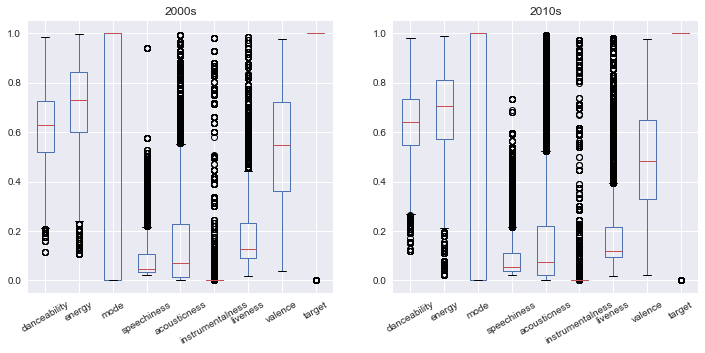

In [44]:
fig,(ax1, ax2) = plt.subplots(figsize = (12,5), ncols = 2)

df_00_merged.boxplot(column=['danceability', 'energy', 'mode', 
                             'speechiness', 'acousticness', 
                             'instrumentalness', 'liveness', 
                             'valence', 'target'], ax = ax1)

df_10_merged.boxplot(column=['danceability', 'energy', 'mode', 
                             'speechiness', 'acousticness', 
                             'instrumentalness', 'liveness', 
                             'valence', 'target'], ax = ax2)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30)
ax1.set_title("2000s")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30)
ax2.set_title("2010s")

plt.show()

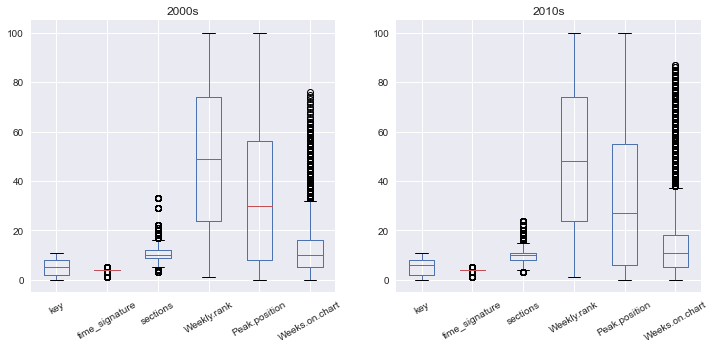

In [45]:
# display values that does not goes from 0 to 1

fig,(ax1, ax2) = plt.subplots(figsize = (12,5), ncols = 2)

df_00_merged.boxplot(column=['key', 'time_signature', 'sections', 
                             'Weekly.rank','Peak.position', 'Weeks.on.chart'], ax = ax1)

df_10_merged.boxplot(column=['key', 'time_signature', 'sections', 
                             'Weekly.rank','Peak.position', 'Weeks.on.chart'], ax = ax2)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30)
ax1.set_title("2000s")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30)
ax2.set_title("2010s")

plt.show()

In [46]:
df_00_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50650 entries, 0 to 50649
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             50650 non-null  object 
 1   artist            50650 non-null  object 
 2   danceability      50650 non-null  float64
 3   energy            50650 non-null  float64
 4   key               50650 non-null  int64  
 5   loudness          50650 non-null  float64
 6   mode              50650 non-null  int64  
 7   speechiness       50650 non-null  float64
 8   acousticness      50650 non-null  float64
 9   instrumentalness  50650 non-null  float64
 10  liveness          50650 non-null  float64
 11  valence           50650 non-null  float64
 12  tempo             50650 non-null  float64
 13  duration_ms       50650 non-null  int64  
 14  time_signature    50650 non-null  int64  
 15  chorus_hit        50650 non-null  float64
 16  sections          50650 non-null  int64 

display different bar graph based on the weeks on chart

In [47]:
df_00_merged['Weeks.on.chart'].value_counts()

0     3011
2     2936
3     2863
4     2788
5     2696
      ... 
72       1
73       1
74       1
75       1
76       1
Name: Weeks.on.chart, Length: 77, dtype: int64

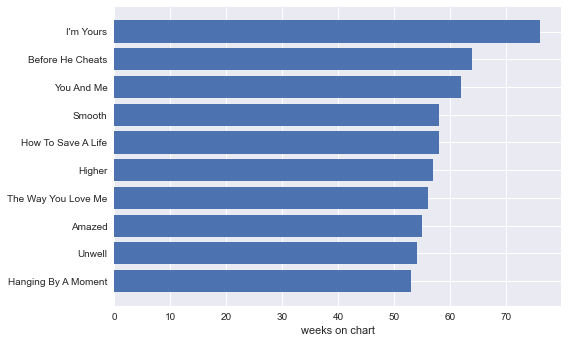

In [48]:
# when finding the general demonstration of each weeks based on each track or artist
# used the dataframe without duplicates, but when drawing a visualization (plot)
# for a specific artist or track, use the one with duplicates for better answer

df_tmp3 = df_tmp1.sort_values(by=['Weeks.on.chart'], ascending = False)

plt.barh(y = df_tmp3['track'][:10], width = df_tmp3['Weeks.on.chart'][:10])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

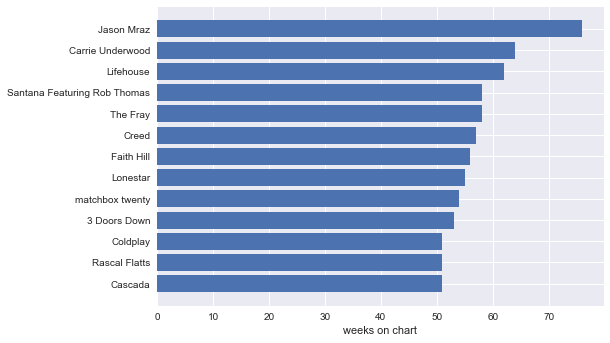

In [49]:
df_tmp3 = df_tmp1.sort_values(by=['Weeks.on.chart'], ascending = False)

plt.barh(y = df_tmp3['artist'][:15], width = df_tmp3['Weeks.on.chart'][:15])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

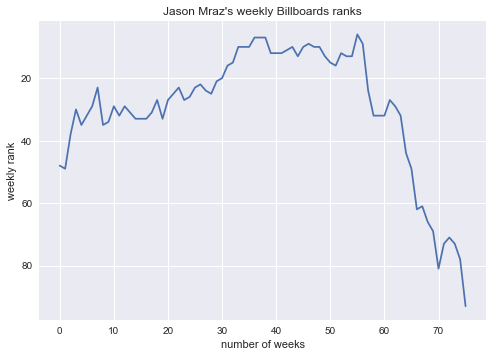

In [50]:
df_tmp4 = df_00_merged[df_00_merged['artist'] == 'Jason Mraz']
df_tmp4.reset_index(inplace = True)
plt.plot(df_tmp4['Weekly.rank'])
plt.ylabel("weekly rank")
plt.xlabel("number of weeks")
plt.title("Jason Mraz's weekly Billboards ranks")

# for weekly rank, higher means more popular, flip the y axis
plt.gca().invert_yaxis() 
plt.show()

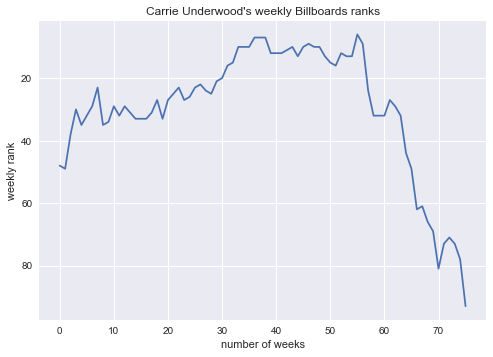

In [51]:
df_tmp5 = df_00_merged[df_00_merged['artist'] == 'Carrie Underwood']
df_tmp5.reset_index(inplace = True)
plt.plot(df_tmp4['Weekly.rank'])
plt.ylabel("weekly rank")
plt.xlabel("number of weeks")
plt.title("Carrie Underwood's weekly Billboards ranks")
plt.gca().invert_yaxis()
plt.show()

same thing in 2010s

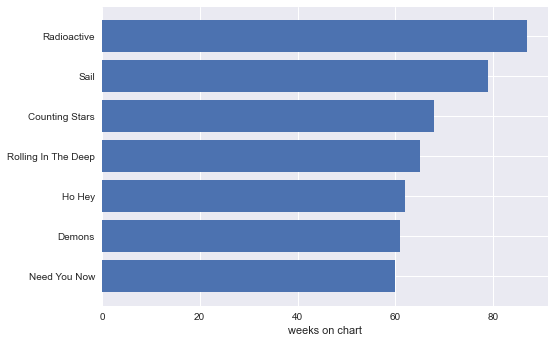

In [52]:
df_tmp6 = df_tmp2.sort_values(by=['Weeks.on.chart'], ascending = False)

plt.barh(y = df_tmp6['track'][:10], width = df_tmp6['Weeks.on.chart'][:10])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

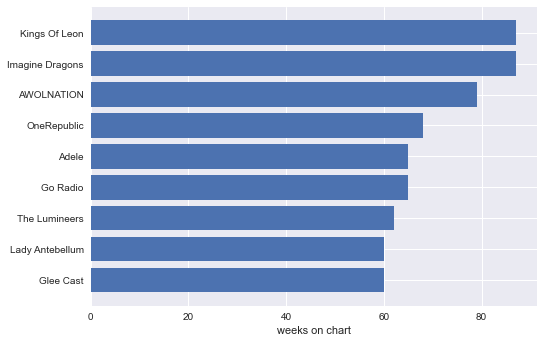

In [53]:
df_tmp7 = df_tmp2.sort_values(by=['Weeks.on.chart'], ascending = False)

plt.barh(y = df_tmp7['artist'][:10], width = df_tmp7['Weeks.on.chart'][:10])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

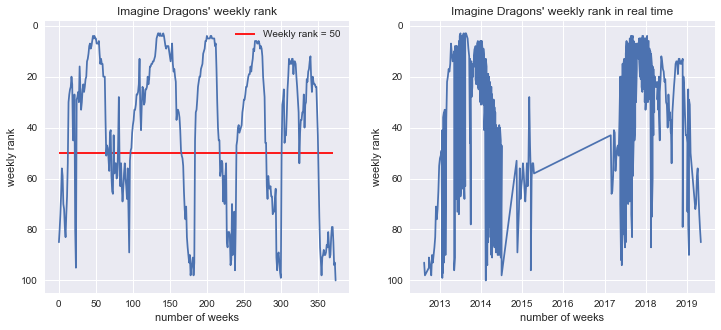

In [54]:
# draw imagine dragon's weekly rank based on number of weeks
# first one is number of weeks, second is number of weeks in real time

df_tmp8 = df_10_merged[(df_10_merged['artist'] == 'Imagine Dragons') &
                       (df_10_merged['Date'] >= datetime.date(2012, 2, 14))].reset_index()

df_10_sorted = df_10_merged.sort_values(by=['Week'], ascending = False)

fig, (ax1, ax2) = plt.subplots(figsize = (12,5), ncols = 2)

ax1.plot(df_tmp8['Weekly.rank'])

ax1.hlines(50, 0, 370, label = "Weekly rank = 50", colors = 'red')
ax1.legend(loc = "upper right")
ax1.set_ylabel("weekly rank")
ax1.set_xlabel("number of weeks")
ax1.set_title("Imagine Dragons' weekly rank")
ax1.invert_yaxis()

ax2.plot(df_10_sorted[(df_10_sorted['artist'] == 'Imagine Dragons') & 
                      (df_10_sorted['Date'] >= datetime.date(2012, 2, 14))]['Week'],
         df_10_sorted[(df_10_sorted['artist'] == 'Imagine Dragons') & 
                      (df_10_sorted['Date'] >= datetime.date(2012, 2, 14))]['Weekly.rank'])

# ax2.set_xticklabels(df_10_merged[df_10_merged['artist'] == 'Imagine Dragons']['Week'])

ax2.set_ylabel("weekly rank")
ax2.set_xlabel("number of weeks")
ax2.set_title("Imagine Dragons' weekly rank in real time")
ax2.invert_yaxis()

plt.show()

display plot of top 5 artists and top 5 tracks based on different features

In [55]:
df_10_sort_by_weeks_on_chart = df_10_sorted.sort_values(by=['Weeks.on.chart'], ascending = False)

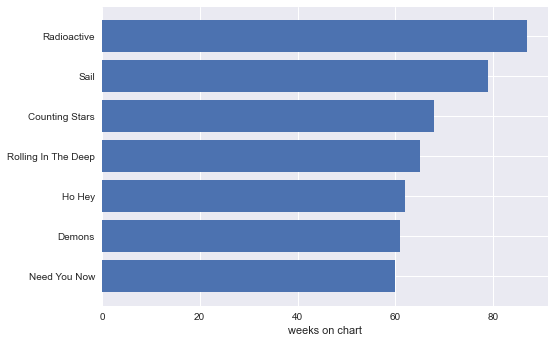

In [56]:
plt.barh(y = df_tmp6['track'][:10], width = df_tmp6['Weeks.on.chart'][:10])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

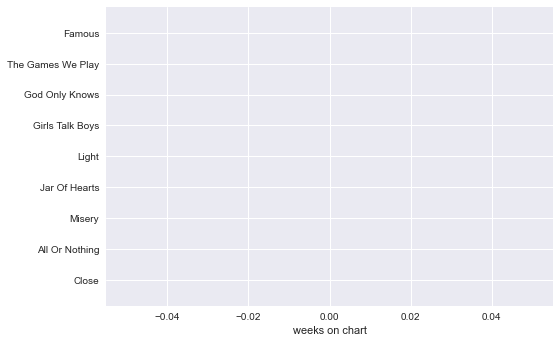

In [57]:
plt.barh(y = df_tmp6['track'][-10 :], width = df_tmp6['Weeks.on.chart'][-10 :])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

Last few tracks have 0 weeks on chart <br>
This happends becuase few musics were on a billbord top 100 for less than a week <br>
As I predict the whether or not music can be a hit, this can be ignored.

# Model with Visualization

import necessary library to all models

In [58]:
# import necessary library

import seaborn as sns
import statsmodels.api as sm
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from mlxtend.plotting import plot_decision_regions
from IPython.display import Image

from sklearn import metrics, tree
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix, ConfusionMatrixDisplay #plot_roc_curve, 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_regression

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline

# Multiple Linear Regression

Using multiple linear regression, find the relatiship between each features and the track

In [59]:
# open csv file that will be used for every models
df_00 = pd.read_csv('data/df_00.csv')
df_10 = pd.read_csv('data/df_10.csv')

visual and statistics from 2000s to 2010

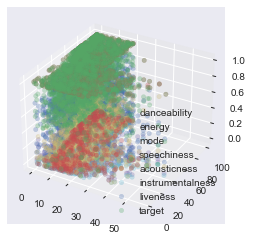

In [60]:
df_00_samp = df_00.sample(1500)

labels = ["danceability", "energy", "mode", "speechiness", 
          "acousticness", "instrumentalness", "liveness", "target"]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for l in labels:
    ax.scatter(df_00_samp['Weeks.on.chart'], df_00_samp['Weekly.rank'], 
               df_00_samp[l], label = l, alpha = 0.3)


ax.legend(loc = "best")
plt.show()

### Multiple linear regression using statsmodels.OLS()

2000 to 2009

In [61]:
X0, y0 = df_00.select_dtypes(exclude=['object']), df_00['Weeks.on.chart']

In [62]:
model01 = sm.OLS(y0, X0).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Weeks.on.chart   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.093e+31
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:29:38   Log-Likelihood:                      1.4293e+06
No. Observations:               50650   AIC:                                 -2.859e+06
Df Residuals:                   50631   BIC:                                 -2.858e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability      5.204e-16   5.19e-15      0.100      0.920   -9.65e-15    1.07e-14
energy           -2.937e-14    5.4e-15     -5.434      0.000      -4e-14   -1.88e-14
key                2.28e-15   1.71e-16     13.350      0.000    1.95e-15    2.62e-15
loudness          8.084e-16   3.76e-16      2.148      0.032    7.08e-17    1.55e-15
mode              1.232e-14   1.33e-15      9.292      0.000    9.72e-15    1.49e-14
speechiness       8.155e-14   6.65e-15     12.266      0.000    6.85e-14    9.46e-14
acousticness     -5.704e-14   3.71e-15    -15.394      0.000   -6.43e-14   -4.98e-14
instrumentalness  5.464e-14   8.34e-15      6.553      0.000    3.83e-14     7.1e-14
liveness          1.364e-14   4.61e-15      2.960      0.003    4.61e-15    2.27e-14
valence          -2.709e-14   3.47e-15     -7.810      0.000   -3.39e-14   -2.03e-14
tempo            -1.775e-16    2.1e-17     -8.444      0.000   -2.19e-16   -1.36e-16
duration_ms      -3.981e-19    1.8e-20    -22.152      0.000   -4.33e-19   -3.63e-19
time_signature   -1.663e-14   1.81e-15     -9.212      0.000   -2.02e-14   -1.31e-14
chorus_hit        2.881e-16   3.66e-17      7.871      0.000    2.16e-16     3.6e-16
sections         -5.803e-16   3.49e-16     -1.664      0.096   -1.26e-15    1.03e-16
target            5.579e-14   3.45e-15     16.164      0.000     4.9e-14    6.26e-14
Weekly.rank        3.33e-16   2.81e-17     11.837      0.000    2.78e-16    3.88e-16
Peak.position     2.759e-17   3.04e-17      0.909      0.363   -3.19e-17    8.71e-17
Weeks.on.chart       1.0000   7.46e-17   1.34e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    18935.134   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264044.096
Skew:                           1.412   Prob(JB):                         0.00
Kurtosis:                      13.823   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared is 1 which is too perfect to be used. Use this as reference to find the better target

In [63]:
# compaired with 2010s, danceability is noticeable, so use danceability as a target
# since weeks on chart is a time, and it can be considered as categorical columns


X0_d, y0_d = df_00.select_dtypes(exclude=['object']).drop(['danceability'], axis = 1), df_00['danceability']

model01_d = sm.OLS(y0_d, X0_d).fit()
model01_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           danceability   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          8.489e+04
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:29:39   Log-Likelihood:                          37649.
No. Observations:               50650   AIC:                                 -7.526e+04
Df Residuals:                   50632   BIC:                                 -7.510e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy              -0.1797      0.005    -39.406      0.000      -0.189      -0.171
key                  0.0003      0.000      1.966      0.049    8.71e-07       0.001
loudness            -0.0043      0.000    -13.447      0.000      -0.005      -0.004
mode                -0.0228      0.001    -20.110      0.000      -0.025      -0.021
speechiness          0.1933      0.006     34.340      0.000       0.182       0.204
acousticness        -0.0780      0.003    -24.730      0.000      -0.084      -0.072
instrumentalness     0.0747      0.007     10.466      0.000       0.061       0.089
liveness            -0.0875      0.004    -22.271      0.000      -0.095      -0.080
valence              0.3375      0.003    131.618      0.000       0.332       0.343
tempo               -0.0009   1.75e-05    -53.045      0.000      -0.001      -0.001
duration_ms       2.334e-08   1.54e-08      1.516      0.129   -6.83e-09    5.35e-08
time_signature       0.1213      0.001     83.682      0.000       0.118       0.124
chorus_hit           0.0003   3.13e-05     10.825      0.000       0.000       0.000
sections             0.0076      0.000     25.551      0.000       0.007       0.008
target               0.1139      0.003     39.098      0.000       0.108       0.120
Weekly.rank         -0.0001   2.41e-05     -5.851      0.000      -0.000   -9.37e-05
Peak.position       -0.0002    2.6e-05     -8.188      0.000      -0.000      -0.000
Weeks.on.chart       0.0001   6.39e-05      1.784      0.074   -1.12e-05       0.000
==============================================================================
Omnibus:                      579.800   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.163
Skew:                          -0.143   Prob(JB):                    8.90e-181
Kurtosis:                       3.558   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# to make it easier to compare with 2010, create model with energy

X0_e, y0_e = df_00.select_dtypes(exclude=['object']).drop(['energy'], axis = 1), df_00['energy']

model01_e = sm.OLS(y0_e, X0_e).fit()
model01_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 energy   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          1.192e+05
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:29:39   Log-Likelihood:                          39718.
No. Observations:               50650   AIC:                                 -7.940e+04
Df Residuals:                   50632   BIC:                                 -7.924e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability        -0.1656      0.004    -39.406      0.000      -0.174      -0.157
key                  0.0028      0.000     19.886      0.000       0.003       0.003
loudness             0.0357      0.000    134.587      0.000       0.035       0.036
mode                 0.0061      0.001      5.559      0.000       0.004       0.008
speechiness          0.0223      0.005      4.074      0.000       0.012       0.033
acousticness        -0.2409      0.003    -84.437      0.000      -0.246      -0.235
instrumentalness     0.1511      0.007     22.145      0.000       0.138       0.164
liveness             0.1033      0.004     27.450      0.000       0.096       0.111
valence              0.2221      0.003     83.024      0.000       0.217       0.227
tempo                0.0007    1.7e-05     38.545      0.000       0.001       0.001
duration_ms       3.207e-07   1.47e-08     21.804      0.000    2.92e-07     3.5e-07
time_signature       0.1773      0.001    140.886      0.000       0.175       0.180
chorus_hit          -0.0001   3.01e-05     -4.659      0.000      -0.000   -8.12e-05
sections            -0.0032      0.000    -11.203      0.000      -0.004      -0.003
target               0.0373      0.003     13.164      0.000       0.032       0.043
Weekly.rank          0.0003   2.31e-05     10.873      0.000       0.000       0.000
Peak.position        0.0002   2.49e-05      8.727      0.000       0.000       0.000
Weeks.on.chart       0.0011   6.11e-05     18.407      0.000       0.001       0.001
==============================================================================
Omnibus:                      994.737   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2077.553
Skew:                           0.068   Prob(JB):                         0.00
Kurtosis:                       3.983   Cond. No.                     3.44e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

more resonable coef with R squared. Valence, time_signature, and target is noticeable.

In [65]:
# print table for powerpoint (reports) where target = danceability

result_00 = { 'features' : ['valence', 'time signature', 'target', 'instrumentalness'], 
             'coef' : [0.3375, 0.1213, 0.1139, 0.0747] }

df_result_00 = pd.DataFrame(result_00)

print('2000 to 2009')
print(f'R square: {0.968} \n')
print(df_result_00.to_string(index = False))

2000 to 2009
R square: 0.968 

         features    coef
          valence  0.3375
   time signature  0.1213
           target  0.1139
 instrumentalness  0.0747


In [66]:
# print table for powerpoint (reports) where target = energy

result_00 = { 'features' : ['valence', 'time signature', 'target', 'instrumentalness'], 
             'coef' : [0.2221, 0.1773, 0.0373, 0.1511] }

df_result_00 = pd.DataFrame(result_00)

print('2000 to 2009')
print(f'R square: {0.977} \n')
print(df_result_00.to_string(index = False))

2000 to 2009
R square: 0.977 

         features    coef
          valence  0.2221
   time signature  0.1773
           target  0.0373
 instrumentalness  0.1511


#### try with different conditions

repeate with Intercept

In [67]:
predictors = sm.add_constant(X0)
predictors

,const,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
0,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,95,65,17
1,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,85,65,16
2,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,79,65,15
3,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,83,65,14
4,1.0,0.578,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,80,65,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50645,1.0,0.539,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,76,70,5
50646,1.0,0.539,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,70,70,4
50647,1.0,0.539,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,76,76,3
50648,1.0,0.539,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,79,79,2


In [68]:
model02 = sm.OLS(y0, predictors).fit()
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.058e+30
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:29:39   Log-Likelihood:             1.3961e+06
No. Observations:               50650   AIC:                        -2.792e+06
Df Residuals:                   50630   BIC:                        -2.792e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.052e-13   2.56e-14     -8.012      0.000   -2.55e-13   -1.55e-13
danceability      3.045e-14   1.04e-14      2.937      0.003    1.01e-14    5.08e-14
energy            2.165e-14   1.15e-14      1.889      0.059   -8.12e-16    4.41e-14
key              -1.312e-15    3.3e-16     -3.976      0.000   -1.96e-15   -6.65e-16
loudness          -4.03e-15   7.77e-16     -5.189      0.000   -5.55e-15   -2.51e-15
mode              1.631e-16   2.57e-15      0.063      0.949   -4.88e-15     5.2e-15
speechiness       5.759e-14   1.28e-14      4.490      0.000    3.25e-14    8.27e-14
acousticness     -1.885e-14   7.32e-15     -2.573      0.010   -3.32e-14   -4.49e-15
instrumentalness  1.274e-14   1.61e-14      0.793      0.428   -1.88e-14    4.42e-14
liveness           1.05e-14   8.88e-15      1.182      0.237   -6.91e-15    2.79e-14
valence          -6.681e-15   6.72e-15     -0.994      0.320   -1.99e-14    6.49e-15
tempo             1.039e-16   4.24e-17      2.453      0.014    2.09e-17    1.87e-16
duration_ms      -3.176e-19   3.51e-20     -9.045      0.000   -3.86e-19   -2.49e-19
time_signature    1.266e-14   4.77e-15      2.654      0.008    3.31e-15     2.2e-14
chorus_hit       -3.444e-16   7.08e-17     -4.861      0.000   -4.83e-16   -2.06e-16
sections         -2.191e-15   6.72e-16     -3.259      0.001   -3.51e-15   -8.73e-16
target            1.272e-14   6.92e-15      1.837      0.066   -8.52e-16    2.63e-14
Weekly.rank      -1.149e-16   5.43e-17     -2.116      0.034   -2.21e-16   -8.47e-18
Peak.position    -3.717e-16   5.85e-17     -6.352      0.000   -4.86e-16   -2.57e-16
Weeks.on.chart       1.0000   1.44e-16   6.92e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     9354.460   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30438.706
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                       6.301   Cond. No.                     5.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared is now 0.445, compare to 0.96, it is getting worse. It has a low corrleation.

standard scaling

In [69]:
standardScale = (X0-np.mean(X0)) / np.std(X0)
standardScale.dropna(axis='columns', inplace = True)

In [70]:
X03 = sm.add_constant(standardScale)
model03 = sm.OLS(y0, X03).fit()
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.089e+32
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:29:39   Log-Likelihood:             1.5256e+06
No. Observations:               50650   AIC:                        -3.051e+06
Df Residuals:                   50630   BIC:                        -3.051e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.5140   8.92e-17   1.29e+17      0.000      11.514      11.514
danceability     -2.134e-16    1.2e-16     -1.782      0.075   -4.48e-16    2.13e-17
energy             8.76e-17   1.47e-16      0.596      0.551   -2.01e-16    3.76e-16
key               3.811e-15   9.03e-17     42.201      0.000    3.63e-15    3.99e-15
loudness         -5.516e-16   1.26e-16     -4.371      0.000   -7.99e-16   -3.04e-16
mode             -3.168e-15   9.32e-17    -33.989      0.000   -3.35e-15   -2.98e-15
speechiness       4.621e-15   9.58e-17     48.240      0.000    4.43e-15    4.81e-15
acousticness      2.633e-15   1.07e-16     24.617      0.000    2.42e-15    2.84e-15
instrumentalness   1.22e-15   9.41e-17     12.954      0.000    1.03e-15     1.4e-15
liveness         -1.086e-15    9.2e-17    -11.803      0.000   -1.27e-15   -9.06e-16
valence          -5.547e-15   1.17e-16    -47.226      0.000   -5.78e-15   -5.32e-15
tempo            -3.275e-15   9.69e-17    -33.800      0.000   -3.46e-15   -3.08e-15
duration_ms       1.856e-15   1.27e-16     14.657      0.000    1.61e-15     2.1e-15
time_signature    -3.53e-15   9.05e-17    -39.024      0.000   -3.71e-15   -3.35e-15
chorus_hit        1.593e-15   9.89e-17     16.104      0.000     1.4e-15    1.79e-15
sections          5.411e-15   1.29e-16     41.970      0.000    5.16e-15    5.66e-15
target            1.628e-15   9.38e-17     17.362      0.000    1.44e-15    1.81e-15
Weekly.rank       9.263e-16   1.21e-16      7.637      0.000    6.89e-16    1.16e-15
Peak.position     8.396e-16   1.25e-16      6.704      0.000    5.94e-16    1.09e-15
Weeks.on.chart       8.7670   9.82e-17   8.93e+16      0.000       8.767       8.767
==============================================================================
Omnibus:                     1693.628   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2661.880
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                       3.925   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared is not 0.445, it is not as good as before standard scaling. It has a low correlation

#### 2010 to 2019

visual and statistics of 2010s to 2020

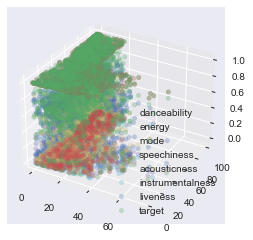

In [71]:
df_10_samp = df_10.sample(1500)

labels = ["danceability", "energy", "mode", "speechiness", 
          "acousticness", "instrumentalness", "liveness", "target"]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for l in labels:
    ax.scatter(df_10_samp['Weeks.on.chart'], df_10_samp['Weekly.rank'], 
               df_10_samp[l], label = l, alpha = 0.3)


ax.legend(loc = "best")
plt.show()

linear regression using statsmodels.OLS()

In [72]:
X1, y1 = df_10.select_dtypes(exclude=['object']), df_10['Weeks.on.chart']

In [73]:
model1 = sm.OLS(y1, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Weeks.on.chart   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.490e+32
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:29:41   Log-Likelihood:                      1.5642e+06
No. Observations:               52514   AIC:                                 -3.128e+06
Df Residuals:                   52495   BIC:                                 -3.128e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability      2.331e-14   9.87e-16     23.617      0.000    2.14e-14    2.52e-14
energy            1.783e-14    1.2e-15     14.849      0.000    1.55e-14    2.02e-14
key               2.645e-16   3.42e-17      7.738      0.000    1.98e-16    3.32e-16
loudness         -9.442e-16   7.95e-17    -11.872      0.000    -1.1e-15   -7.88e-16
mode              -1.54e-15   2.69e-16     -5.726      0.000   -2.07e-15   -1.01e-15
speechiness      -3.247e-15   1.37e-15     -2.375      0.018   -5.93e-15   -5.68e-16
acousticness       2.04e-14   6.93e-16     29.430      0.000     1.9e-14    2.18e-14
instrumentalness -1.445e-13   1.45e-15    -99.677      0.000   -1.47e-13   -1.42e-13
liveness          1.898e-14   9.11e-16     20.849      0.000    1.72e-14    2.08e-14
valence          -8.677e-15   6.83e-16    -12.700      0.000      -1e-14   -7.34e-15
tempo             3.239e-16   4.37e-18     74.124      0.000    3.15e-16    3.32e-16
duration_ms      -5.326e-20   3.92e-21    -13.573      0.000   -6.09e-20   -4.56e-20
time_signature    1.616e-14   3.78e-16     42.769      0.000    1.54e-14    1.69e-14
chorus_hit       -1.479e-16   7.72e-18    -19.147      0.000   -1.63e-16   -1.33e-16
sections         -1.409e-15   7.08e-17    -19.901      0.000   -1.55e-15   -1.27e-15
target           -7.536e-14   6.04e-16   -124.858      0.000   -7.65e-14   -7.42e-14
Weekly.rank      -2.203e-16   5.93e-18    -37.155      0.000   -2.32e-16   -2.09e-16
Peak.position    -1.548e-16   6.15e-18    -25.191      0.000   -1.67e-16   -1.43e-16
Weeks.on.chart       1.0000    1.3e-17    7.7e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     4794.052   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34726.975
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                       6.983   Cond. No.                     2.81e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Similar to 2000s, R square is 1, use this as reference, and use danceability and energy as a target variable

In [74]:
X1_e, y_e = df_10.select_dtypes(exclude=['object']).drop(['energy'], axis = 1), df_10['energy']

model1_e = sm.OLS(y_e, X1_e).fit()
model1_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 energy   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          1.357e+05
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:29:41   Log-Likelihood:                          45425.
No. Observations:               52514   AIC:                                 -9.081e+04
Df Residuals:                   52496   BIC:                                 -9.065e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability        -0.1275      0.004    -35.970      0.000      -0.134      -0.121
key                  0.0010      0.000      8.434      0.000       0.001       0.001
loudness             0.0385      0.000    163.809      0.000       0.038       0.039
mode                 0.0041      0.001      4.206      0.000       0.002       0.006
speechiness         -0.0239      0.005     -4.807      0.000      -0.034      -0.014
acousticness        -0.1948      0.002    -82.120      0.000      -0.199      -0.190
instrumentalness     0.1507      0.005     28.822      0.000       0.140       0.161
liveness             0.1090      0.003     33.296      0.000       0.103       0.115
valence              0.2107      0.002     91.336      0.000       0.206       0.215
tempo                0.0006   1.57e-05     36.933      0.000       0.001       0.001
duration_ms       2.786e-07   1.42e-08     19.605      0.000    2.51e-07    3.06e-07
time_signature       0.1814      0.001    161.631      0.000       0.179       0.184
chorus_hit           0.0006    2.8e-05     19.915      0.000       0.001       0.001
sections            -0.0009      0.000     -3.458      0.001      -0.001      -0.000
target              -0.0051      0.002     -2.313      0.021      -0.009      -0.001
Weekly.rank          0.0003   2.15e-05     12.851      0.000       0.000       0.000
Peak.position        0.0001   2.23e-05      6.705      0.000       0.000       0.000
Weeks.on.chart       0.0004   4.72e-05      9.164      0.000       0.000       0.001
==============================================================================
Omnibus:                      771.359   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1458.127
Skew:                          -0.046   Prob(JB):                         0.00
Kurtosis:                       3.811   Cond. No.                     2.75e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
X1_d, y_d = df_10.select_dtypes(exclude=['object']).drop(['danceability'], axis = 1), df_10['danceability']

model1_d = sm.OLS(y_d, X1_d).fit()
model1_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           danceability   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          7.743e+04
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:29:41   Log-Likelihood:                          35133.
No. Observations:               52514   AIC:                                 -7.023e+04
Df Residuals:                   52496   BIC:                                 -7.007e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy              -0.1887      0.005    -35.970      0.000      -0.199      -0.178
key                 -0.0007      0.000     -4.441      0.000      -0.001      -0.000
loudness            -0.0034      0.000     -9.607      0.000      -0.004      -0.003
mode                -0.0131      0.001    -11.054      0.000      -0.015      -0.011
speechiness          0.2554      0.006     42.994      0.000       0.244       0.267
acousticness        -0.1103      0.003    -36.438      0.000      -0.116      -0.104
instrumentalness     0.0211      0.006      3.297      0.001       0.009       0.034
liveness            -0.0416      0.004    -10.352      0.000      -0.050      -0.034
valence              0.2106      0.003     73.176      0.000       0.205       0.216
tempo               -0.0006   1.91e-05    -31.591      0.000      -0.001      -0.001
duration_ms      -5.193e-07   1.72e-08    -30.195      0.000   -5.53e-07   -4.86e-07
time_signature       0.1583      0.002    104.054      0.000       0.155       0.161
chorus_hit           0.0007    3.4e-05     21.245      0.000       0.001       0.001
sections             0.0102      0.000     32.795      0.000       0.010       0.011
target               0.0985      0.003     37.388      0.000       0.093       0.104
Weekly.rank      -9.276e-05   2.62e-05     -3.539      0.000      -0.000   -4.14e-05
Peak.position       -0.0002   2.72e-05     -7.863      0.000      -0.000      -0.000
Weeks.on.chart    3.627e-05   5.74e-05      0.631      0.528   -7.63e-05       0.000
==============================================================================
Omnibus:                     1422.944   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1868.449
Skew:                          -0.323   Prob(JB):                         0.00
Kurtosis:                       3.660   Cond. No.                     2.78e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

more reasonable R squared. Valence, instrumentalness, and time_signature has stronger relationship with energy <br>
Speechiness and time signature has a relationship with danceability

In [76]:
# print table for powerpoint (reports) where target = energy

result_00 = { 'features' : ['valence', 'time signature', 'target', 'instrumentalness'], 
             'coef' : [0.2107, 0.1814, -0.0051, 0.1507] }
df_result_00 = pd.DataFrame(result_00)
print('2010 to 2019')
print(f'R square: {0.979} \n')
print(df_result_00.to_string(index = False))

# print(df_result_00.head())

2010 to 2019
R square: 0.979 

         features    coef
          valence  0.2107
   time signature  0.1814
           target -0.0051
 instrumentalness  0.1507


In [77]:
# print table for powerpoint (reports) where target = danceability

result_00 = { 'features' : ['valence', 'time signature', 'target', 'instrumentalness'], 
             'coef' : [0.2106, 0.1583, 0.0985, 0.0211] }
df_result_00 = pd.DataFrame(result_00)
print('2010 to 2019')
print(f'R square: {0.964} \n')
print(df_result_00.to_string(index = False))

# print(df_result_00.head())

2010 to 2019
R square: 0.964 

         features    coef
          valence  0.2106
   time signature  0.1583
           target  0.0985
 instrumentalness  0.0211


repeate with Intercept

In [78]:
predictors = sm.add_constant(X1)
predictors

,const,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
0,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,77,50,20
1,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,66,50,19
2,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,58,50,18
3,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,52,50,17
4,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,51,50,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52509,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,58,46,5
52510,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,74,46,4
52511,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,46,46,3
52512,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,53,53,2


In [79]:
model2 = sm.OLS(y1, predictors).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.058e+28
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:29:42   Log-Likelihood:             1.3385e+06
No. Observations:               52514   AIC:                        -2.677e+06
Df Residuals:                   52494   BIC:                        -2.677e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.194e-12   2.06e-13    -10.660      0.000    -2.6e-12   -1.79e-12
danceability      1.076e-14   7.51e-14      0.143      0.886   -1.37e-13    1.58e-13
energy            1.375e-13   9.45e-14      1.454      0.146   -4.78e-14    3.23e-13
key               4.387e-15   2.53e-15      1.733      0.083   -5.74e-16    9.35e-15
loudness         -4.865e-15   6.21e-15     -0.784      0.433    -1.7e-14     7.3e-15
mode              2.965e-14   1.99e-14      1.492      0.136   -9.29e-15    6.86e-14
speechiness       5.745e-14   1.01e-13      0.569      0.569   -1.41e-13    2.55e-13
acousticness      6.919e-14   5.21e-14      1.327      0.185    -3.3e-14    1.71e-13
instrumentalness -5.995e-14   1.07e-13     -0.562      0.574   -2.69e-13    1.49e-13
liveness           4.77e-14   6.71e-14      0.711      0.477   -8.38e-14    1.79e-13
valence          -4.725e-14   5.03e-14     -0.939      0.348   -1.46e-13    5.14e-14
tempo             2.584e-16   3.29e-16      0.785      0.432   -3.87e-16    9.03e-16
duration_ms      -4.348e-19   2.91e-19     -1.492      0.136   -1.01e-18    1.36e-19
time_signature    1.011e-14   4.08e-14      0.248      0.804   -6.99e-14    9.01e-14
chorus_hit       -3.918e-16   5.73e-16     -0.683      0.495   -1.52e-15    7.32e-16
sections         -4.396e-15   5.23e-15     -0.840      0.401   -1.46e-14    5.86e-15
target            2.782e-14   4.53e-14      0.614      0.539    -6.1e-14    1.17e-13
Weekly.rank      -4.753e-16   4.38e-16     -1.086      0.277   -1.33e-15    3.82e-16
Peak.position     1.679e-16   4.52e-16      0.371      0.711   -7.19e-16    1.05e-15
Weeks.on.chart       1.0000   9.61e-16   1.04e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     3915.909   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16072.837
Skew:                           0.274   Prob(JB):                         0.00
Kurtosis:                       5.654   Cond. No.                     5.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squareis 0.681 which is not as good as before

standard scaling

In [80]:
standardScale = (X1-np.mean(X1)) / np.std(X1)

In [81]:
standardScale.dropna(axis='columns', inplace = True)

In [82]:
X3 = sm.add_constant(standardScale)
model3 = sm.OLS(y1, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.109e+30
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:29:42   Log-Likelihood:             1.4108e+06
No. Observations:               52514   AIC:                        -2.822e+06
Df Residuals:                   52494   BIC:                        -2.821e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.6951   2.27e-15   5.59e+15      0.000      12.695      12.695
danceability       1.06e-15   2.65e-15      0.400      0.689   -4.13e-15    6.25e-15
energy           -1.181e-14   4.02e-15     -2.937      0.003   -1.97e-14   -3.93e-15
key              -2.654e-16    2.3e-15     -0.116      0.908   -4.77e-15    4.24e-15
loudness          8.301e-15   3.58e-15      2.318      0.020    1.28e-15    1.53e-14
mode              3.886e-16   2.34e-15      0.166      0.868    -4.2e-15    4.98e-15
speechiness      -5.924e-16   2.44e-15     -0.243      0.808   -5.38e-15    4.19e-15
acousticness     -6.335e-15   2.75e-15     -2.307      0.021   -1.17e-14   -9.53e-16
instrumentalness -7.841e-16   2.63e-15     -0.299      0.765   -5.93e-15    4.36e-15
liveness          2.305e-15   2.34e-15      0.983      0.325   -2.29e-15     6.9e-15
valence          -2.331e-15   2.74e-15     -0.852      0.394   -7.69e-15    3.03e-15
tempo            -2.545e-15   2.38e-15     -1.069      0.285   -7.21e-15    2.12e-15
duration_ms      -5.424e-15   3.21e-15     -1.689      0.091   -1.17e-14     8.7e-16
time_signature    4.984e-15   2.32e-15      2.151      0.032    4.42e-16    9.53e-15
chorus_hit        4.254e-15   2.56e-15      1.664      0.096   -7.56e-16    9.26e-15
sections          5.308e-16   3.22e-15      0.165      0.869   -5.79e-15    6.85e-15
target           -2.934e-14   2.52e-15    -11.650      0.000   -3.43e-14   -2.44e-14
Weekly.rank      -4.302e-16   3.18e-15     -0.135      0.892   -6.66e-15     5.8e-15
Peak.position     1.794e-15   3.19e-15      0.562      0.574   -4.46e-15    8.05e-15
Weeks.on.chart      10.4284   2.53e-15   4.13e+15      0.000      10.428      10.428
==============================================================================
Omnibus:                    10357.001   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27148.071
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       5.792   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R square is 0.681 which is not as good as before

In both cases, reference to the one without intercept, without stadard scaling

# k-fold cross validation

K-Fold cross validation model using pipeline

create pipeline with grid search <br>
used lecture, model_tuning_and_pipelines, as reference

In [83]:
# start the model with creating X, y and train/test split

X0, y0 = df_00.select_dtypes(exclude=['object']), df_00['Weeks.on.chart']

# train and test split
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, 
                                                    random_state=27)

In [84]:
pipeline_k1 = Pipeline([ ('imputer', SimpleImputer(strategy = 'median')), 
                     ('std_scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier())
                    ])

# Train the pipeline (tranformations & predictor)
# fit -> fit with all ml and transform data, but final estimator will not create prediction
pipeline_k1.fit(X0_train, y0_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted_k1 = pipeline_k1.predict(X0_test)

# find best estimator score
score_k1 = pipeline_k1.score(X0_test, y0_test)

print(f"""
K-fold
predicted: {predicted_k1}
score: {score_k1}
""")


K-fold
predicted: [10  6  3 ...  3 10  6]
score: 0.0613030602171767



Because the accuracy is not good, try different parameters for k-fold cross validation and check accuracy

In [85]:
# from https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

# because it takes long time to run, and unnecessary plot, save the image and comments out the code

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X0)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X0, y0, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# plt.show

plt.savefig('image/KNeighbor_1.png')

In [86]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X0)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y0, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# plt.show

plt.savefig('image/KNeighbor_2.png')

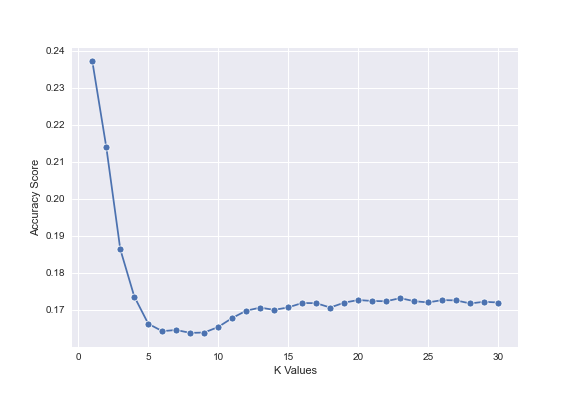

In [87]:
Image(filename='image/KNeighbor_2.png') 

This shows that the highest k-fold validation accuracy is still lower than 25% <br>
It is not a good model, try different model

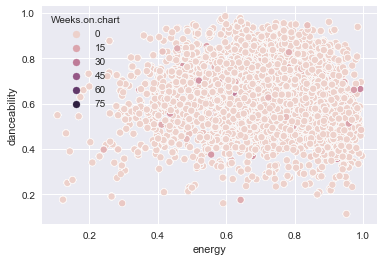

In [88]:
# since results is extremely underfitting, try to create a group with most effective feature 
# from multiple linear regression model

sns.scatterplot(x=df_00['energy'],y=df_00['danceability'], hue=df_00['Weeks.on.chart'])
plt.show()

plt.savefig('image/group_plot_energy_danceability')

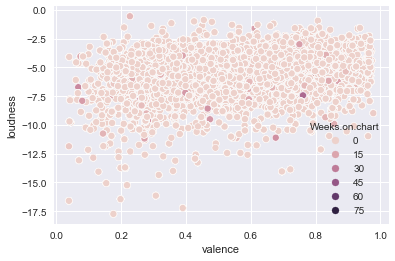

In [89]:
sns.scatterplot(x=df_00['valence'],y=df_00['loudness'], hue=df_00['Weeks.on.chart'])
plt.show()

The plot shows that there is no relationship between energy and danceability, valence and loudness against weeks on chart. <br>
This breifly shows why the k-fold validation accuracy is low

## Decision Tree Classifier

Since K-fold cross validation is not working, try different models

re-create x, y, train/test as it could have been changed by an accident

In [90]:
X0, y0 = df_00.select_dtypes(exclude=['object']), df_00['Weeks.on.chart']

In [91]:
# train and test split
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, 
                                                    random_state=27)

In [92]:
pipeline_tree = Pipeline([ ('imputer', SimpleImputer(strategy = 'median')), # replace missing value
                     ('std_scaler', StandardScaler()), 
                     ('dt_clf', DecisionTreeClassifier(max_depth = 25, random_state = 42))]) #max_depth = 25,

# Train the pipeline (tranformations & predictor)
# fit -> fit with all ml and transform data, but final estimator will not create prediction
pipeline_tree.fit(X0_train, y0_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted_tree = pipeline_tree.predict(X0_test)

# find best estimator score
score_tree = pipeline_tree.score(X0_test, y0_test)

print(f"""
predicted: {predicted_tree}
score: {score_tree}
""")

print(f"""

Decision Tree Classifier accuracy: {score_tree}

""")


predicted: [13 10  4 ...  5 14  9]
score: 0.9396841066140178



Decision Tree Classifier accuracy: 0.9396841066140178




the score is very high using decision tree classifier. <br>
This may be considered as overfitting, but it is still lower than 95 percent

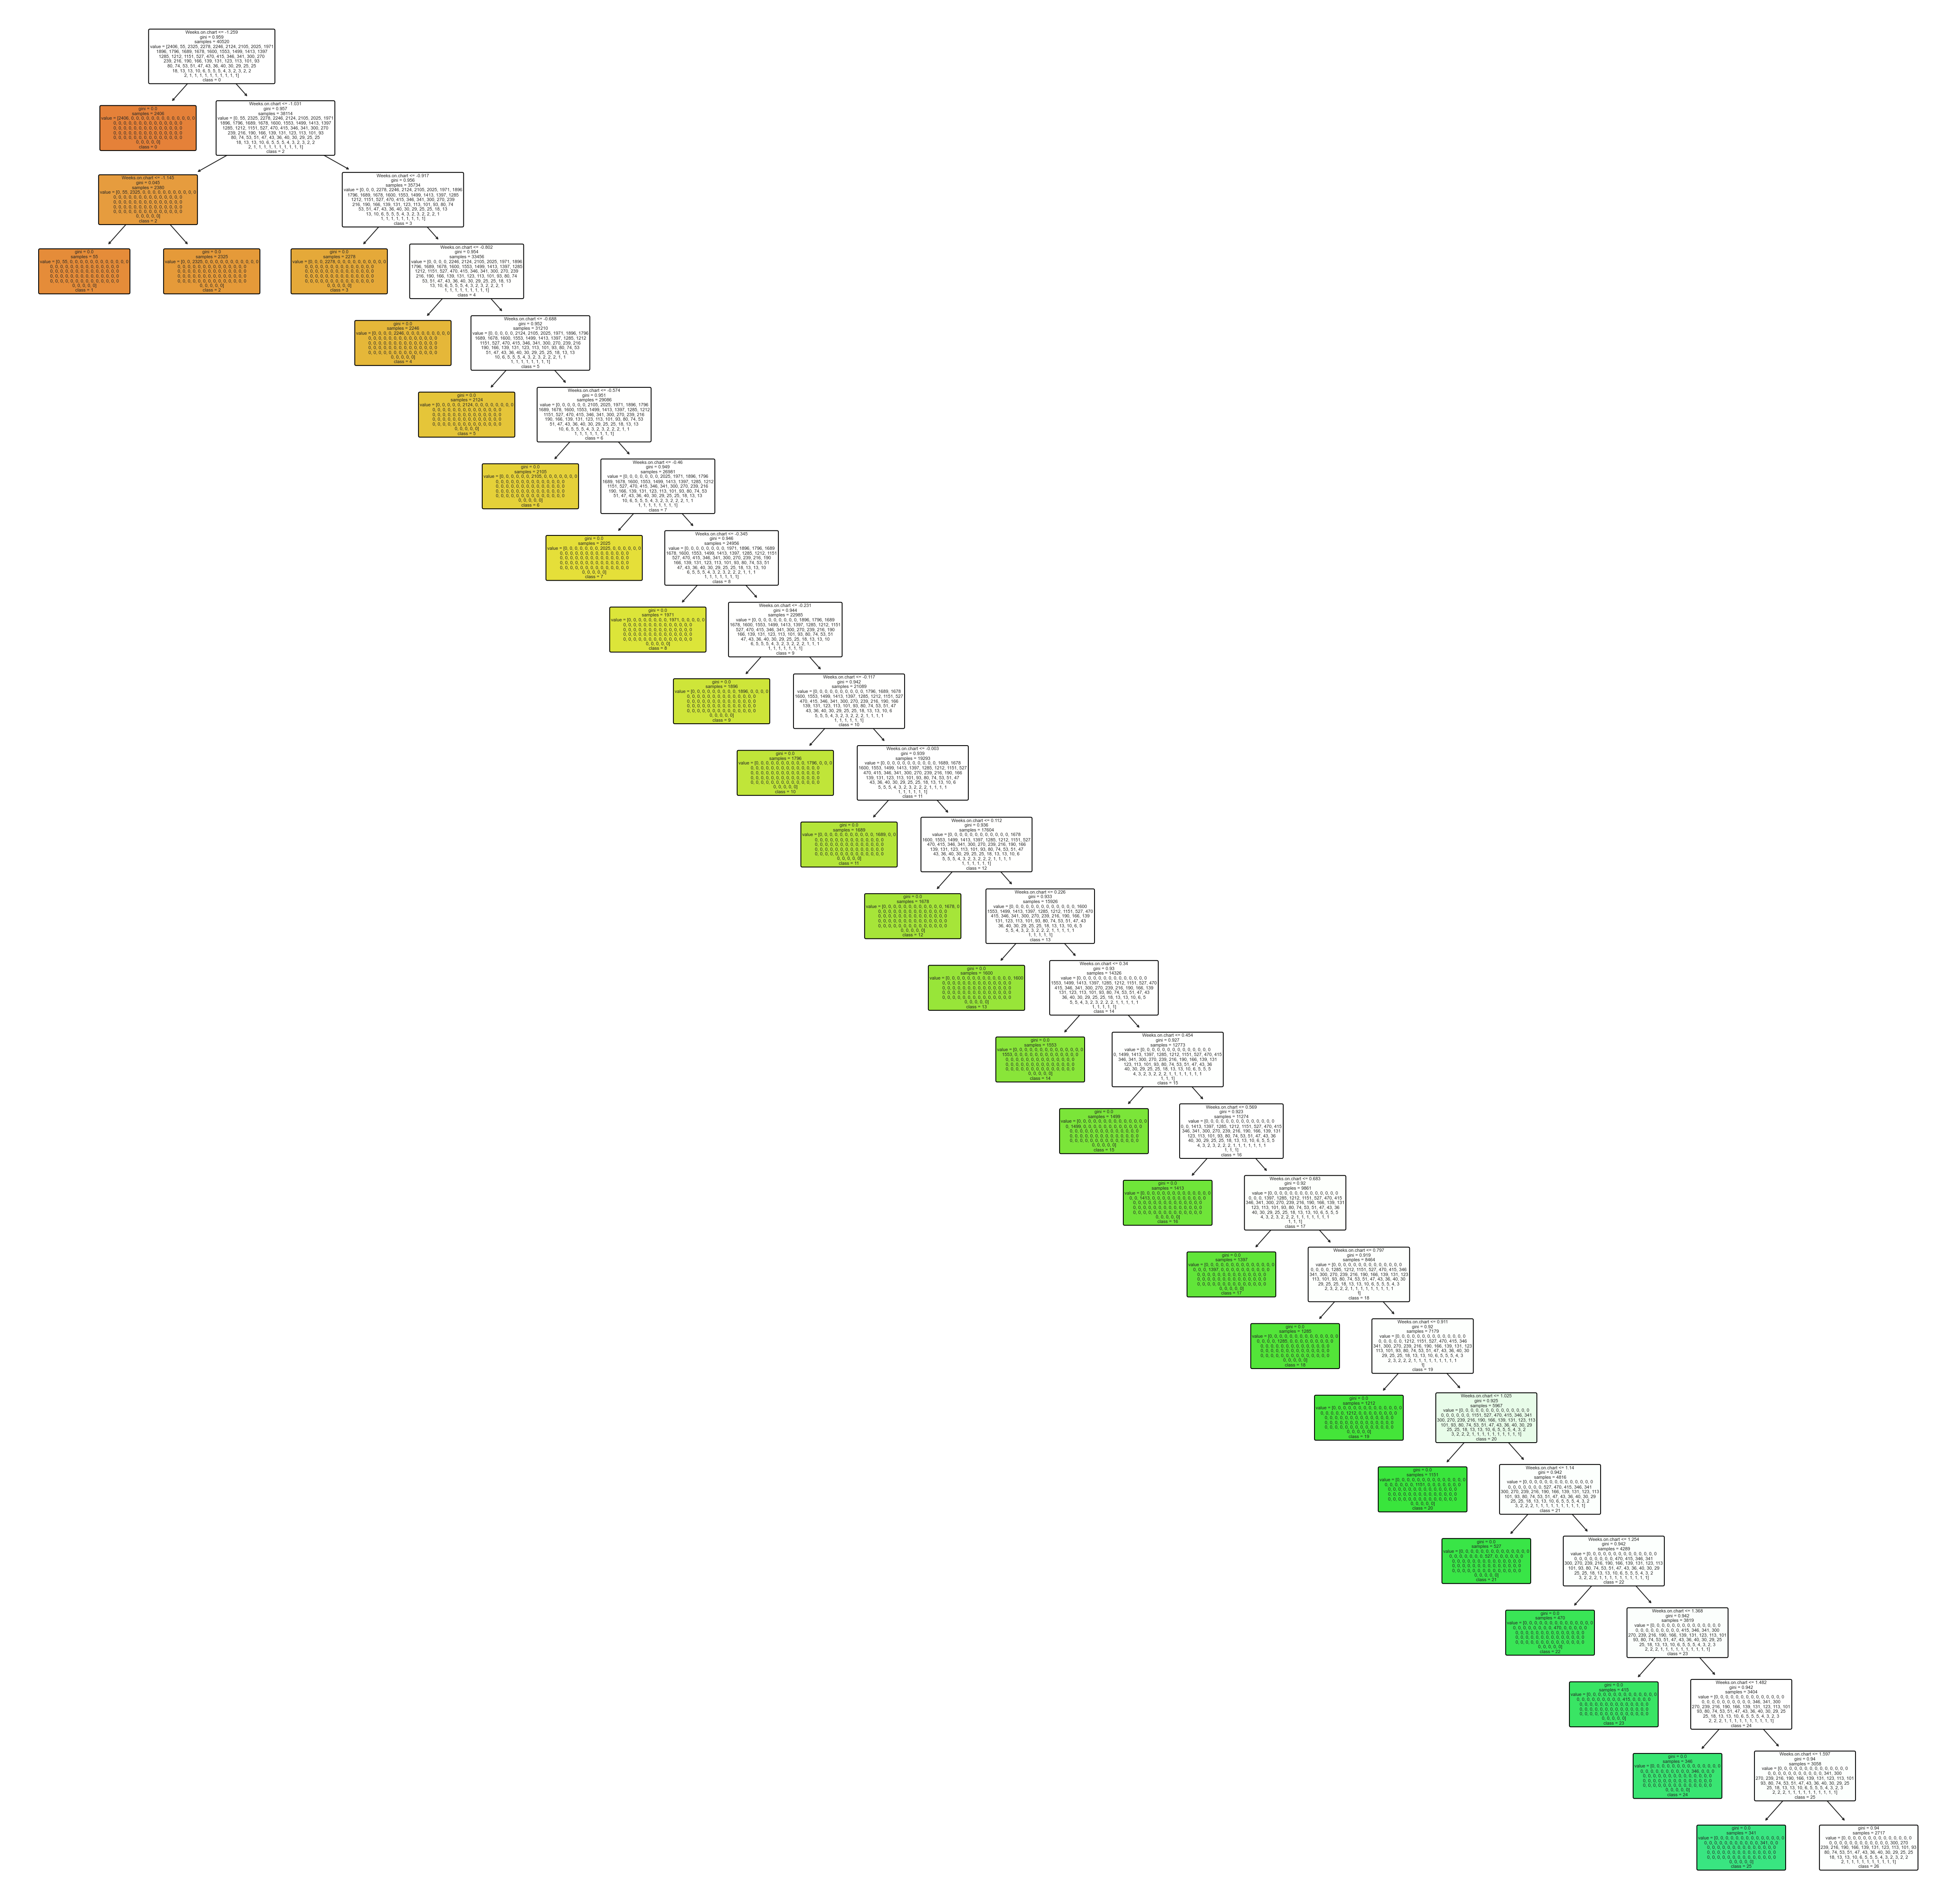

In [93]:
# create visualization

plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(pipeline_tree['dt_clf'], 
               feature_names=X0.columns,
               class_names=np.unique(y0).astype('str'),
               filled=True, rounded=True)
plt.show()

# plt.savefig('image/tree.png')

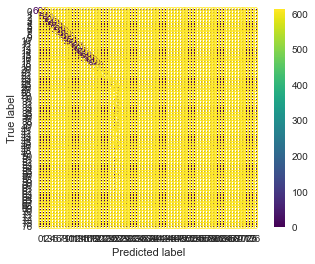

In [94]:
cm = confusion_matrix(y0_test, predicted_tree, labels=pipeline_tree['dt_clf'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_tree['dt_clf'].classes_ ) 

disp.plot()
plt.show()

# plt.savefig('image/confusion_matrix.png')

#, labels = ['Weeks.on.chart']) 
# , 'tempo', 'Weeks.on.chart', 'duration_ms' .set(xticklabels = X0_test.labels, x_ticks = X0_test)

Decision Tree Classifier may have an efficiency problem, but it has an accuracy of 93 percent. <br>
this shows that Decision Tree Classifier should be choosen. <br>
It has an efficiency problem as it shows in each plot, but yet, it can be still used to predict whether the music could be a hit